# Исследование объявлений о продаже квартир.


<p><b>Цель исследования</b> - определение рыночной стоимости объектов недвижимости.<p>

<p><b>Задачи:</b><p>
<p>1.Провести анализ данных.<p>
<p>2.Определить сколько времени занимает продажа объекта недвижимости.<p>
<p>3.Определить как зависит цена объекта недвижимости от:
<p> а) Площади.<p>
<p>б) Количества комнат.<p>
<p>в) Удаленности до центра.<p>
<p>г.) Этажа расположения.<p>
<p>д.) Даты размещения объявления (день недели, месяц, год).<p>
<p>4.Вычислить квартиры которые находятся в центре СПБ и определить как цена на эти квартиры зависит от площади, количества комнат, удаленности от центра, этажа расположения:
    

<h1>Содержание<span class="tocSkip"></span></h1>
    <div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item">
    </ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li>
    <li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li>
    <li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li>
    <li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li>
    <li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Изучение данных из файла

In [1]:
#Импортируем библиотеки необходимые для работы 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#в переменную df помещаем значение таблицы
df = pd.read_csv('real_estate_data.csv', sep='\t')

In [3]:
#выведем первые пять строк таблицы на экран
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
# с помощью info выведем информацию о таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод
Таблица содержит 22 столбца, 23699 строки, типы данных в столбцах bool (логический) - два столбца, float64 (вещественный) - 14 столбцов, int64 (целочисленный) - 3 столбца, object(текст) - 3 столбца. В строках имеются пропущенные значения. Название столбцов требуют изменения.

## Предобработка данных

Изменим название столбцов

In [5]:
#приведем названия столбцов в соответствие с требованиями.
df = df.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 'parks_around3000': 'parks_around_3000', 'ponds_around3000': 'ponds_around_3000'})

### Анализ пропущенных значений

In [6]:
# проверим, какую долю составляют пропущенные значения в каждом из столбцов с пропусками
df.isna().mean().sort_values(ascending=False) * 100

is_apartment            88.290645
parks_nearest           65.909954
ponds_nearest           61.559559
balcony                 48.605426
ceiling_height          38.799105
airports_nearest        23.384953
city_centers_nearest    23.287902
parks_around_3000       23.283683
ponds_around_3000       23.283683
days_exposition         13.422507
kitchen_area             9.612220
living_area              8.029875
floors_total             0.362885
locality_name            0.206760
first_day_exposition     0.000000
last_price               0.000000
total_area               0.000000
studio                   0.000000
rooms                    0.000000
floor                    0.000000
open_plan                0.000000
total_images             0.000000
dtype: float64

 В столбце **is_apartment** имеется 88% пропущенных значений, разберемся почему.

In [7]:
# выведем уникальные значения столбца
df['is_apartment'].unique()

array([nan, False, True], dtype=object)

В столбце присутствуют значения nan, False, True, а тип столбца object. Тип столбца определен не верно, преобразуем в bool

In [8]:
#преобразуем тип данных
df['is_apartment'] = df['is_apartment'].astype('bool')

In [9]:
#пустые значения заменим на False
df['is_apartment'] = df['is_apartment'].fillna(False)

Большое количество пропущенных значений в столбцах **parks_nearest,  ponds_nearest** - 60%. В столбцах **airports_nearest, city_centers_nearest, ponds_around_3000, parks_around_3000** - количество пропущенных значений почти одинаково и составляет - 23%. В столбцах **days_exposition, kitchen_area, living_area** колличестов пропущенных значений не велико и составляет 13, 8, 9 процентов соответственно. Пропущенные значения в данных столбцах, заменить  медианным.           

<div class="alert alert-block alert-info">
Заменим пропущенные значения медианным. Учел замечание.
</div>

In [10]:
#заменим значение на медианные
df['parks_nearest'] = df['parks_nearest'].fillna(df['parks_nearest'].median())
df['ponds_nearest'] = df['ponds_nearest'].fillna(df['ponds_nearest'].median())
df['airports_nearest'] = df['airports_nearest'].fillna(df['airports_nearest'].median())
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
df['city_centers_nearest'] = df['city_centers_nearest'].fillna(df['city_centers_nearest'].median())
df['parks_around_3000'] = df['parks_around_3000'].fillna(df['parks_around_3000'].median())
df['ponds_around_3000'] = df['ponds_around_3000'].fillna(df['ponds_around_3000'].median())

In [11]:
# код ревьюера 
import datetime as dt

df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['first_day_year'] = df['first_day_exposition'].dt.year
df[df['days_exposition'].isnull()].pivot_table(columns = 'first_day_year', values = 'total_area', aggfunc = 'count')

first_day_year,2014,2015,2016,2017,2018,2019
total_area,18,70,67,271,959,1796


In [12]:
average_tottal_to_living_area = df['total_area'].mean() / df['living_area'].mean()
df['living_area'] = df['living_area'].fillna(df['total_area'] / average_tottal_to_living_area)

In [13]:
average_tottal_to_living_area = df['total_area'].mean() / df['kitchen_area'].mean()
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area'] / average_tottal_to_living_area)

В столбце **balcony** пропущенные значения заменим на ноль, так как скорее всего в данных где нет значения отсутствуют балконы.               

In [14]:
df['balcony'] = df['balcony'].fillna(0)

В столбце **floors_total** заменим пропущенные значения на самый популярный этаж. Так как количество данных не велико, то это не приведет к искажению результата.

In [15]:
#сгруппируем для того чтобы найти самую популярную этажность дома
df.groupby('floors_total')['parks_nearest'].count().sort_values(ascending=False).head(5)

floors_total
5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
Name: parks_nearest, dtype: int64

In [16]:
#заменим пропущенные значения на самую популярную этажность
df['floors_total'] = df['floors_total'].fillna(5)

In [17]:
#заменим в столбце 'locality_name' пропущенные значения на нет данных
df['locality_name'] = df['locality_name'].fillna('no_date')

В столбцах **floors_total, balcony, days_exposition** находятся целочисленные значения, заменим тип данных.

In [18]:
df['floors_total'] = df['floors_total'].astype('int64')
df['balcony'] = df['balcony'].astype('int64')
#df['days_exposition'] = df['days_exposition'].astype('int64')

Столбце  **first_day_exposition** находится дата и время размещения объявлений, заменим тип данных на **datetime64**

In [19]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')

Проверим есть ли в таблице дубликаты

In [20]:
df.duplicated().sum()

0

Дубликатов  нет.

In [21]:
#проверим результаты преобразований 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23699 non-null object
airports_nearest        23699 non-null float64
city_centers_nearest    23699 non-null float64
parks_around_3000       23699 non-null float64
parks_nearest           23699 non-null float64
ponds_aroun

### Вывод
<p>В столбце is_apartment имеется 88% пропущенных значений, изменили тип на bool. Где данные отсутствовали  заменим значение на False.<p>
<p>Таблица содержит множество пропущенных значений, в одних столбцах is_apartment, floors_total, balcony существует логическое объяснение заменяемым данным, в других столбцах переменные объяснить пропуски данных на данном этапе исследования нельзя, заменим их медианными значениями.<p>
<p>В столбце is_apartment пропущенные значения заменим на False, считаем что данных нет это не апартаменты. Изменил тип на bool.<p>
<p>В столбцах airports_nearest, city_centers_nearest, ponds_around_3000, parks_around_3000, days_exposition, kitchen_area, living_area. Пропущенные значения в данных столбцах, заменим  медианным. Среднее не подойдет, так как большой разброс значений.  
<p>В столбце balcony пропущенные значения заменим на ноль, так как скорее всего в данных где нет значения - отсутствуют балконы.<p>
<p>В столбце floors_total заменим пропущенные значения на самый популярный этаж. Так как количество данных не велико, то это не приведёт к искажению результата.<p>
<p>В столбцах floors_total, balcony, days_exposition находятся целочисленные значения, заменим тип данных float на int.<p>
<p>Стобце first_day_exposition находится дата и время размещения объявлений, заменим тип данных на datetime64<p>

## Расчёты и добавление результатов в таблицу

Добавим в таблицу цену квадратного метра для этого поделим общую площадь на стоимость квартиры

In [22]:
df['price_area'] = df['last_price'] / df['total_area']
#Округлим значения до сотых
df['price_area'] = df['price_area'].round(2)

Добавим в таблицу день недели, месяц и год публикации объявления

In [23]:
#Создадим отдельно столбец с днем
df['day_of_week'] = df['first_day_exposition'].dt.weekday

In [24]:
#Создадим отдельно столбец с месяцем
df['month'] = df['first_day_exposition'].dt.month

In [25]:
#Создадим отдельно столбец с годом
df['year'] = df['first_day_exposition'].dt.year

Добавим таблицу этаж квартиры

In [26]:
def name_floor(x):
    if x['floor'] == x['floors_total']:
        return 'последний'
    if x['floor'] == 1:
        return 'первый'
    return 'другой'

In [27]:
#создадим столбец с этажом квартиры
df['floor_flat'] = df.apply(name_floor, axis=1)

Посчитаем соотношение жилой и общей площади

In [28]:
df['living_ratio_total'] = df['living_area'] / df['total_area']

Посчитаем отношение площади кухни к общей

In [29]:
df['kitchen_ratio_total'] = df['kitchen_area'] / df['total_area']

## Исследовательский анализ данных

### Анализ площади, цены, числа комнат, высоты потолков

Изучим площадь продаваемых квартир

In [30]:
#выведем статистические данные по объекту
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

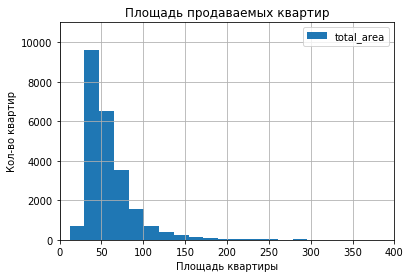

In [31]:
#построим гистограмму 
df['total_area'].plot(kind='hist', 
                      y='column', 
                      alpha=1, 
                      bins=50, 
                      grid=True, 
                      legend=True,
                     figsize=(6,4))
plt.title("Площадь продаваемых квартир")
plt.xlabel("Площадь квартиры")
plt.ylabel("Кол-во квартир")
plt.axis([0, 400, 0, 11000])
plt.show()

In [32]:
#посчитаем количество квартир у которых общая площадь больше 200 кв. метров
df.query('total_area > 300')['total_area'].count() / len(df) * 100

0.25739482678594033

In [33]:
#посчитаем количество квартир у которых общая площадь меньше 200  кв. метров
df.query('total_area < 300')['total_area'].count() / len(df) * 100

99.73416599856535

- Из данных видно, что минимальная площадь объекта составляет 12 кв. метров, максимальная 900 кв. метров. 
- Больше всего квартир имеют площадь (35-50 кв. метров). 
- 99% объектов меньше 200 квадратных метров.

Изучим цену продажи объекта

In [34]:
#выведем статистические данные по объекту
df['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

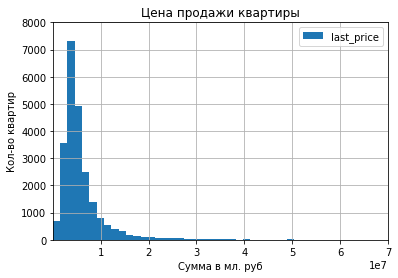

In [35]:
#построим гистограмму 
df['last_price'].plot(kind='hist', 
                      y='column', 
                      alpha=1, 
                      bins=500, 
                      grid=True, 
                      legend=True)
plt.title("Цена продажи квартиры")
plt.xlabel("Сумма в мл. руб")
plt.ylabel("Кол-во квартир")
plt.axis([121900, 70000000, 0, 8000])
plt.show()

In [36]:
#посмотрим сколько квартир больше 30 миллионов
df.query('last_price > 30000000')['total_area'].count()

316

Из данных видно, что минимальная сумма продажи объекта составляет 121900 рублей, максимальная 763 миллионов рублей. 75% объектов продаются меньше чем за 6 миллионов 800 тысяч, 99% объектов продаются меньше чем за 30 миллионов рублей.

Изучим количество комнат

In [37]:
#выведем статистические данные по объекту
df['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

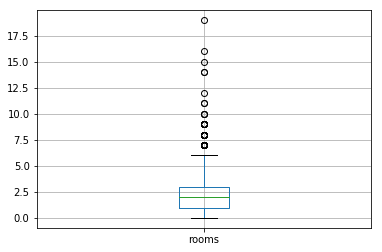

In [38]:
df.boxplot('rooms')
plt.show()

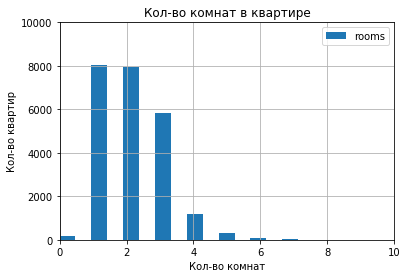

In [39]:
#построим гистограмму 
df['rooms'].plot(kind='hist',  
                      alpha=1, 
                      bins=40, 
                      grid=True, 
                      legend=True)
plt.title("Кол-во комнат в квартире")
plt.xlabel("Кол-во комнат")
plt.ylabel("Кол-во квартир")
plt.axis([0, 10, 0, 10000])
plt.show()

In [40]:
#посчитаем количество квартир в которых 0 комнат
df.query('rooms == 0')['rooms'].count() 

197

In [41]:
#проверим что это за квартиры
df.loc[(df['rooms'] == 0) & (df['is_apartment'] == True)]['rooms'].count()

191

In [42]:
#проверим что это за квартиры
df.loc[(df['rooms'] == 0) & 
       (df['is_apartment'] == False) & 
       (df['open_plan'] == True) & 
       (df['studio'] == False)]['rooms'].count()

1

- 191 квартира это апартаменты
- 5 квартир это квартиры студии
- 1 квартира это квартира свободного плана

In [43]:
#посчитаем количество квартир в которых комнат больше 7
df['rooms'].loc[df['rooms'] > 7].count()

31

- Из данных видно, что минимальное количество комнат 0 (197 объектов), максимальное 19. 
- 75% объектов недвижимости имеют планировку меньше 3 комнат. 
- 2-3 комнатные квартиры самые популярные - около 8 тысяч, далее идут трех комнатные. 
- 195 квартир имеют планировку больше 5 комнат.

Изучим высоту потолков на объектах

In [44]:
#выведем статистические данные по объекту
df['ceiling_height'].describe()

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

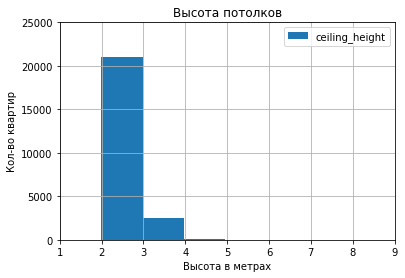

In [45]:
#построим гистограмму 
df['ceiling_height'].plot(kind='hist', 
                      y='column', 
                      alpha=1, 
                      bins=100, 
                      grid=True, 
                      legend=True)
plt.title("Высота потолков")
plt.xlabel("Высота в метрах")
plt.ylabel("Кол-во квартир")
plt.axis([1, 9, 0, 25000])
plt.show()

In [46]:
df.query('ceiling_height < 4')['ceiling_height'].count() / len(df) * 100

99.518967045023

In [47]:
df.query('ceiling_height < 2')['ceiling_height'].count()

3

In [48]:
df.query('ceiling_height >5')['ceiling_height'].count()

36

- Из данных видно, что больше всего квартир имеет высоту потолков от 2 метров до 3 метров таких объектов 99%. 
- Очень странный объект недвижимости где высота потолков менее 2 метров (3 объекта) и где высота потолков 100 метров.

### Анализ времени продажи квартиры

In [49]:
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

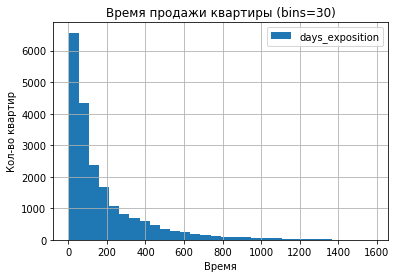

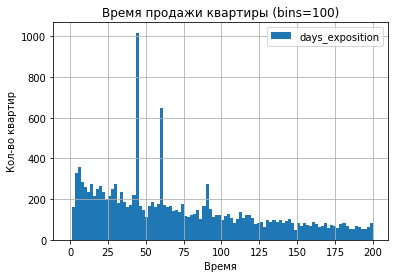

In [50]:
df.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True)
plt.title("Время продажи квартиры (bins=30)")
plt.xlabel("Время")
plt.ylabel("Кол-во квартир")

df.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (-1,200))
plt.title("Время продажи квартиры (bins=100)")
plt.xlabel("Время")
plt.ylabel("Кол-во квартир")
plt.show()

In [51]:
df = df.query('days_exposition != 45.00000000000001 and days_exposition != 60 and days_exposition != 90.00000000000001 and days_exposition != 190 and days_exposition != 0')

In [52]:
df['days_exposition'].describe()

count    18896.000000
mean       191.640188
std        225.707795
min          1.000000
25%         41.000000
50%        110.000000
75%        252.000000
max       1580.000000
Name: days_exposition, dtype: float64

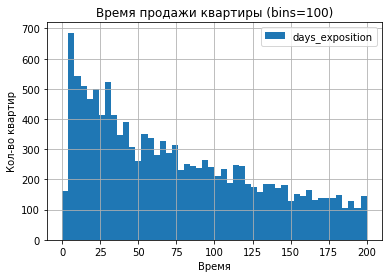

In [53]:
df.plot(y = 'days_exposition', kind = 'hist', bins = 50, grid = True, range = (0,200))
plt.title("Время продажи квартиры (bins=100)")
plt.xlabel("Время")
plt.ylabel("Кол-во квартир")
plt.show()

In [54]:
df['days_exposition'].mean()

191.6401883996613

In [55]:
df['days_exposition'].median()

110.0

Продажа квартиры прошла очень быстро если она была продана в первом квартиле, то есть до 41 день, продажа квартиры заняла очень много времени если она заняла времени более 252 дня (то есть вышла за пределы третьего квартиля). В среднем квартиры продаются за 110 дней.

**Вывод**

- Больше всего квартир имеют площадь (35-50 кв. метров).
- 75% объектов недвижимости продаются меньше чем за 6 миллионов 800 тысяч.
- 2-3 комнатные квартиры самые популярные - около 8 тысяч, далее идут трех комнатные квартиры.
- Больше всего квартир имеет высоту потолков от 2 метров до 3 метров таких объектов 99%.
- Продажа квартиры прошла очень быстро если она была продана в течении 41 дней, продажа квартиры заняла очень много времени если она была продана более чем за 252 дня.
</div>

### Удаление значений

Удалим значения где:
- Площадь квартиры более 200 кв. метров
- Стоимость квартиры более 30 миллионов.
- Количество комнат более 7.
- Высота потолков более 5 метров и менее 2 метров.

Так как в соответствии с гистограммами этих значений очень мало, они нам будут мешать как выбросы.

In [56]:
#Удалим квартиры более 200 кв метров
df = df.drop(df[df['total_area'] > 200].index)

In [57]:
#Удалим квартиры стоимостью более 30 миллионов
df = df.drop(df[df['last_price'] > 30000000].index)

In [58]:
#Удалим квартиры где количество комнат более 8
df = df.drop(df[df['rooms'] > 8].index)

In [59]:
#Удалим квартиры где высота потолков менее 2 и более 5 метров
df = df.drop(df[df['ceiling_height'] < 2].index)
df = df.drop(df[df['ceiling_height'] > 5].index)

### Какие факторы  всего влияют на стоимость квартиры?

**Как цена зависит от площади квартиры**

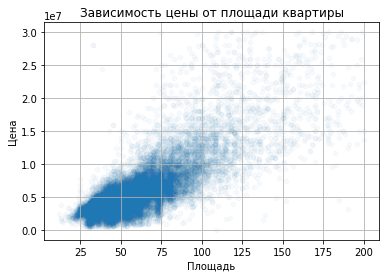

In [60]:
df.plot(x='total_area', y='last_price', kind='scatter', alpha=0.03, grid=True)
plt.title("Зависимость цены от площади квартиры")
plt.xlabel("Площадь")
plt.ylabel("Цена")
plt.show()

In [61]:
#проверим численную взаимосвязь между ценой и площадью квартиры с помощью коэффициента корреляции Пирсона 
df['total_area'].corr(df['last_price'])

0.7886590476716415

На графике и по коэффициенту корреляции можно проследить взаимосвязь между ценой квартиры и площадью. Она положительная, при увеличении площади растет цена квартиры.

**Как цена зависит от числа комнат**

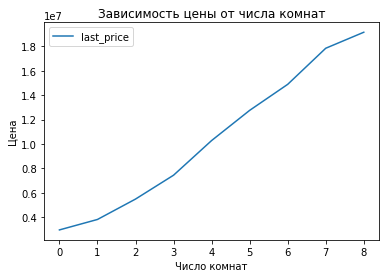

In [62]:
df.pivot_table(index = 'rooms', values = 'last_price', aggfunc = 'mean').plot()
plt.title("Зависимость цены от числа комнат")
plt.xlabel("Число комнат")
plt.ylabel("Цена")
plt.show()

In [63]:
df['rooms'].corr(df['last_price'])

0.4989250941712485

Чем больше комнат в квартире тем она дороже. Зависимость почти линейная.

**Как цена зависит от этажа**

Создадим сгруппированную таблицу столбцы -  floor_flat, а в ячейке медианные значения цены квартиры на этаже первом, последним и другом построим график и посмотрим на их корреляцию

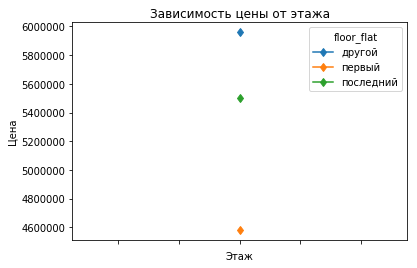

In [64]:
df.pivot_table(columns='floor_flat', values='last_price', aggfunc='mean').plot(marker='d')
plt.title("Зависимость цены от этажа")
plt.xlabel("Этаж")
plt.ylabel("Цена")
plt.show()

Из графика медианных значений видно, что медианная стоимость квартиры  зависит от этажа. Но количество квартир на первом и последнем этаже очень мало по сравнению с квартирами расположенными на других этажах.

**Как цена зависит от удаленности от центра**

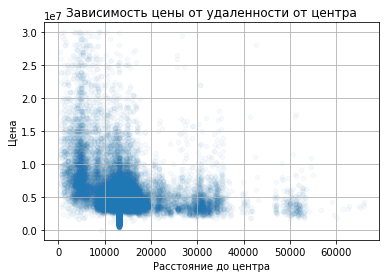

In [65]:
df.plot(x='city_centers_nearest', y='last_price', kind='scatter', alpha=0.03, grid=True)
plt.title("Зависимость цены от удаленности от центра")
plt.xlabel("Расстояние до центра")
plt.ylabel("Цена")
plt.show()

In [66]:
#проверим корреляцию
df['city_centers_nearest'].corr(df['last_price'])

-0.2894115515178899

Из графика видно, что самые дорогие квартиры расположены на удалении 20 километров, далее стоимость квартир начинает падать. Из графика видно что зависимость между ценой квартиры и удаленности её от центра есть, но она очень слабая.

**Как цена зависит от дня недели, месяца и года**

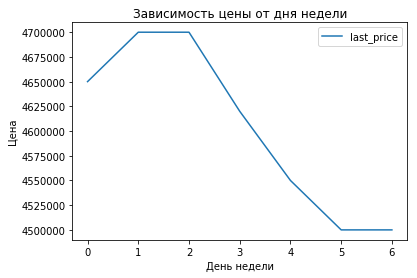

In [67]:
df.pivot_table(index = 'day_of_week', values = 'last_price', aggfunc = 'median').plot()
plt.title("Зависимость цены от дня недели")
plt.xlabel("День недели")
plt.ylabel("Цена")
plt.show()

Из графика видно что самые дорогие объявления размещают со вторника по среду, квартиры подешевле размещают с субботы по воскресенье.

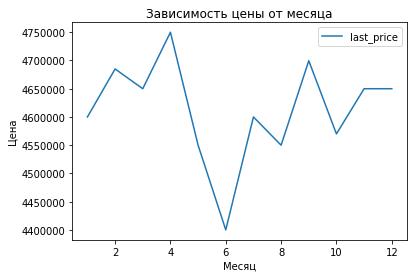

In [68]:
df.pivot_table(index = 'month', values = 'last_price', aggfunc = 'median').plot()
plt.title("Зависимость цены от месяца")
plt.xlabel("Месяц")
plt.ylabel("Цена")
plt.show()


Самая высокая цена продажи квартира апрель, сентябрь, самая низкая июнь. На графике можно проследить зависимость цены продажи квартиры от месяца размещения объявления.

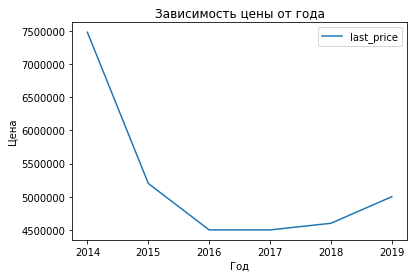

In [69]:
df.pivot_table(index = 'year', values = 'last_price', aggfunc = 'median').plot()
plt.title("Зависимость цены от года")
plt.xlabel("Год")
plt.ylabel("Цена")
plt.show()

До 2016 года стоимость падала, с 2016 по 2018 без изменений, с 2019 опять начался рост стоимости недвижимости.

**Вывод**

- Стоимость квартиры зависит от площади квартиры, числа комнат и удалении от центра.
- Стоимость квартиры зависит от дня недели и месяца размещения объявления.
- С 2019 года квартиры начали дорожать.

### Населённые пункты с наибольшим числом объявлений.

10 населённых пунктов с наибольшим числом объявлений

In [70]:
top_locality = df.pivot_table(index = 'locality_name', values = 'last_price', aggfunc=['count', 'mean'])
top_locality.columns = ['count', 'mean']
top_locality = top_locality.sort_values('count', ascending = False).head(10)
top_locality

,count,mean
locality_name,,
Санкт-Петербург,14428,6.819628e+06
посёлок Мурино,485,3.673251e+06
посёлок Шушары,404,4.103973e+06
Всеволожск,368,3.798172e+06
Пушкин,348,6.217670e+06
Колпино,305,3.864539e+06
посёлок Парголово,290,4.492391e+06
Гатчина,283,3.468125e+06
деревня Кудрово,267,4.226112e+06


In [71]:
#самая высокая стоимость
top_locality[top_locality['mean'] == top_locality['mean'].max()]

,count,mean
locality_name,,
Санкт-Петербург,14428,6.819628e+06


In [72]:
#самая низкая стоимость
top_locality[top_locality['mean'] == top_locality['mean'].min()]

,count,mean
locality_name,,
Выборг,209,3.271067e+06


**Вывод**

Самая высокая стоимость жилья из 10 населённых пунктов с самым большим количеством объявлений в Санкт-Петербурге, тогда как самая низкая стоимость в Выборге.

### Границы центра Санкт-Петербурга

In [73]:
#создадим столбец с удалением от центра в километрах и округлим до целых
df['city_centers_nearest_km'] = (df['city_centers_nearest'] / 1000).round()

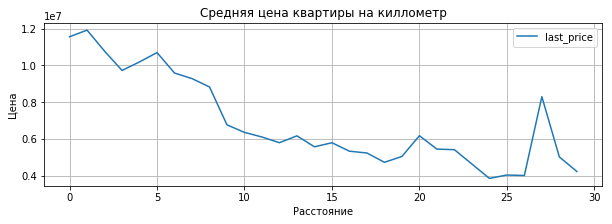

In [74]:
#посчитаем среднею цену для каждого километра
df.query('locality_name == "Санкт-Петербург"').pivot_table(index = 'city_centers_nearest_km', values = 'last_price', aggfunc='mean').plot(grid=True, figsize=(10, 3))
plt.title("Средняя цена квартиры на киллометр")
plt.xlabel("Расстояние")
plt.ylabel("Цена")
plt.show()

**Вывод**

Чем дальше расстояние от центра, тем дешевле стоимость квартиры, заметен  всплеск в районе 27 километров, но как мы обсудили в Slake это Крестовский остров выбивается из данных (там элитное жилье). Возьмём границу 5 километров за центр  города,  далее стоимость жилья постоянно убывает. В районе 10-15 километров стоимость жилья не изменяется и почти одинаковая. Интересно посмотреть на этот пятикилометровый отрезок, что там за объявления.

### Анализ квартир в центре Санкт-Петербурга.

In [75]:
#Выберем квартиры в центре СПБ
center_spb = df.query('city_centers_nearest_km <= 5 & locality_name == "Санкт-Петербург"')

Посмотрим на общую площадь

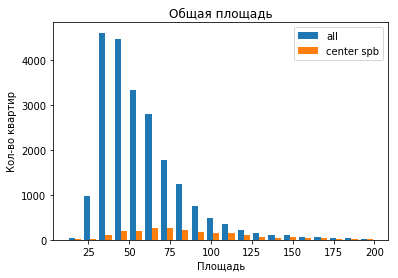

In [76]:
plt.hist([df['total_area'], center_spb['total_area']], bins=20, label=['all', 'center spb'])
plt.legend(loc='upper right')
plt.title("Общая площадь")
plt.xlabel("Площадь")
plt.ylabel("Кол-во квартир")
plt.show()

Решил более подробно посмотреть на форму распределения площади квартир в центре СПБ.

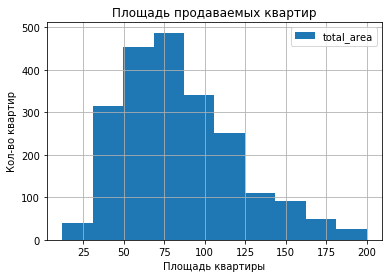

In [77]:
center_spb['total_area'].plot(kind='hist', 
                      y='column', 
                      alpha=1, 
                      bins=10, 
                      grid=True, 
                      legend=True)
plt.title("Площадь продаваемых квартир")
plt.xlabel("Площадь квартиры")
plt.ylabel("Кол-во квартир")
#plt.axis([0, 400, 0, 11000])
plt.show()


Здесь мы видим что распределение площади продаваемых квартир в центре СПБ смещенно. В центре СПБ преобладают квартиры площадью до 30-90 кв. метров.


Посмотрим на цену

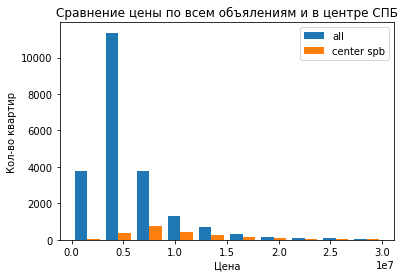

In [78]:
plt.hist([df['last_price'], center_spb['last_price']], bins=10, label=['all', 'center spb'])
plt.legend(loc='upper right')
plt.title("Сравнение цены по всем объялениям и в центре СПБ")
plt.xlabel("Цена")
plt.ylabel("Кол-во квартир")
plt.show()


Решил более подробно посмотреть на распределение квартир в центре СПБ!


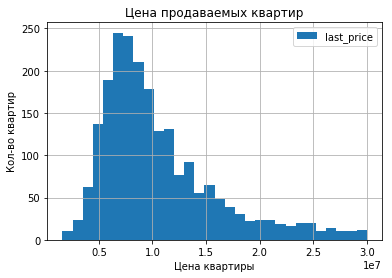

In [79]:
center_spb['last_price'].plot(kind='hist', 
                      y='column', 
                      alpha=1, 
                      bins=30, 
                      grid=True, 
                      legend=True)
plt.title("Цена продаваемых квартир")
plt.xlabel("Цена квартиры")
plt.ylabel("Кол-во квартир")
#plt.axis([0, 400, 0, 11000])
plt.show()


А в центре квартиры будут подороже, так болше всего квартир в ценовом сегменте от 5 до 10 миллионов когда во всех остальных объявлений меньше  5 миллионов!


Посмотрим на количество комнат

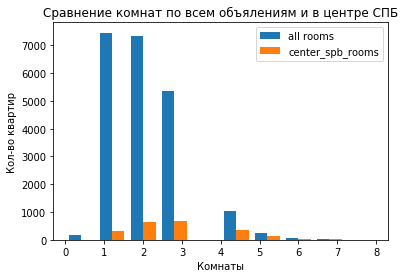

In [80]:
plt.hist([df['rooms'], center_spb['rooms']], bins=10, label=['all rooms', 'center_spb_rooms'])
plt.legend(loc='upper right')
plt.title("Сравнение комнат по всем объялениям и в центре СПБ")
plt.xlabel("Комнаты")
plt.ylabel("Кол-во квартир")
plt.show()


Решил более подробно посмотреть на распределение квартир в центре СПБ!


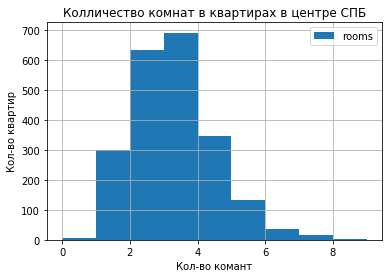

In [81]:
center_spb['rooms'].plot(kind='hist', 
                      y='column', 
                      alpha=1, 
                      bins=range(10), 
                      grid=True, 
                      legend=True)
plt.title("Колличество комнат в квартирах в центре СПБ")
plt.xlabel("Кол-во комант")
plt.ylabel("Кол-во квартир")
#plt.axis([0, 400, 0, 11000])
plt.show()


В центре СПБ преобладают двух и трех комнатные квартиры, тогда как по всем объявлениям одно и двух комнатные.


Посмотрим на высоту потолков

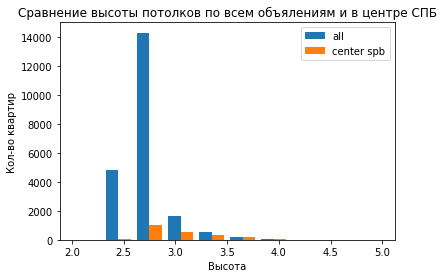

In [82]:
plt.hist([df['ceiling_height'], center_spb['ceiling_height']], bins=10, label=['all', 'center spb'])
plt.legend(loc='upper right')
plt.title("Сравнение высоты потолков по всем объялениям и в центре СПБ")
plt.xlabel("Высота")
plt.ylabel("Кол-во квартир")
plt.show()

Распределение высоты потолков одинаковое с распределениями по остальным объявлениям. Преобладают 2,7 метровые потолки

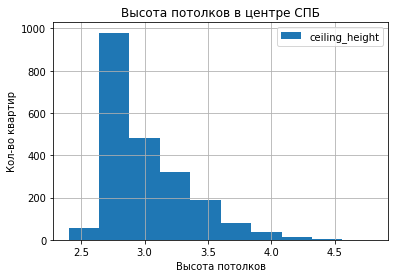

In [83]:
center_spb['ceiling_height'].plot(kind='hist', 
                      y='column', 
                      alpha=1, 
                      bins=10, 
                      grid=True, 
                      legend=True)
plt.title("Высота потолков в центре СПБ")
plt.xlabel("Высота потолков")
plt.ylabel("Кол-во квартир")
plt.show()


Да а тут уже в центре СПБ преобладают 2,6-2,9 метровые потолки как и по всем объявлениям.


**Как цена зависит от площади квартиры**

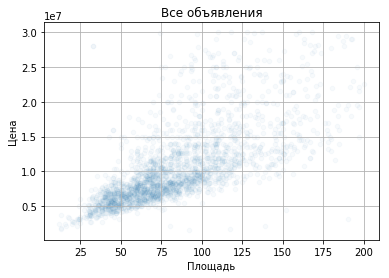

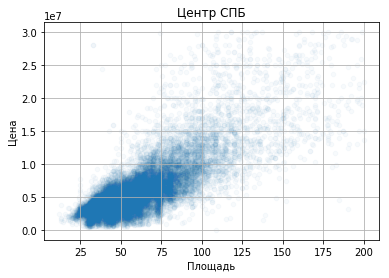

In [84]:
center_spb.plot(x='total_area', y='last_price', kind='scatter', alpha=0.03, grid=True)
plt.title("Все объявления")
plt.xlabel("Площадь")
plt.ylabel("Цена")
df.plot(x='total_area', y='last_price', kind='scatter', alpha=0.03, grid=True)
plt.title("Центр СПБ")
plt.xlabel("Площадь")
plt.ylabel("Цена")
plt.show()

In [85]:
center_spb['total_area'].corr(center_spb['last_price'])

0.690685904294987

Здесь также как и по всем объявлениям чем больше площадь квартиры тем дороже цена. Но в выборке из центра СПБ на графике эта зависимость прослеживается четче.

**Как цена зависит от числа комнат**

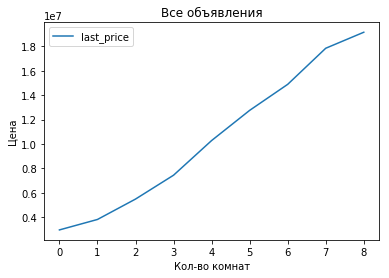

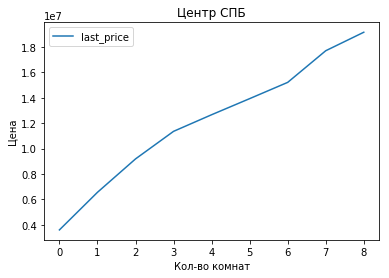

In [86]:
df.pivot_table(index = 'rooms', values = 'last_price', aggfunc = 'mean').plot()
plt.title("Все объявления")
plt.xlabel("Кол-во комнат")
plt.ylabel("Цена")
center_spb.pivot_table(index = 'rooms', values = 'last_price', aggfunc = 'mean').plot()
plt.title("Центр СПБ")
plt.xlabel("Кол-во комнат")
plt.ylabel("Цена")
plt.show()


В центре СПБ как и во всех объявлениях чем больше комнат в кварире тем она дороже. Но в центре СПБ вид кривой другой больше похож на логарифмическую кривую. А после 6 комнат начинает стремительно расти вверх по почти некой ленейной зависимости.


**Как цена зависит от этажа**

Создадим сгруппированную таблицу столбцы -  floor_flat, а в ячейке медианные значения цены квартиры на этаже первом, последним и другом построим график и посмотрим на их корреляцию

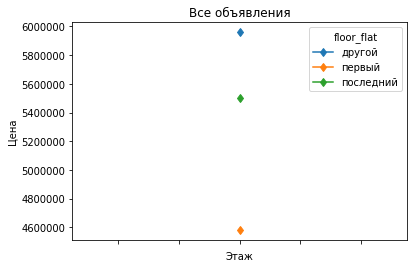

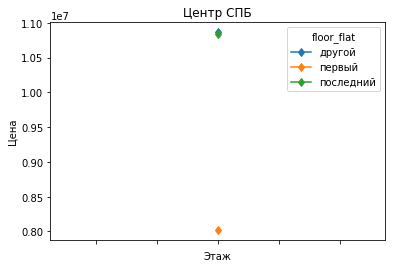

In [87]:
df.pivot_table(columns='floor_flat', values='last_price', aggfunc='mean').plot(marker='d')
plt.title("Все объявления")
plt.xlabel("Этаж")
plt.ylabel("Цена")
center_spb.pivot_table(columns='floor_flat', values='last_price', aggfunc='mean').plot(marker='d')
plt.title("Центр СПБ")
plt.xlabel("Этаж")
plt.ylabel("Цена")
plt.show()

Из графика медианных значений видно, что медианная стоимость квартиры  зависит от этажа. Но в центре СПБ очень ценятся квартиры не на первом этаже.

**Как цена зависит от удаленности от центра**

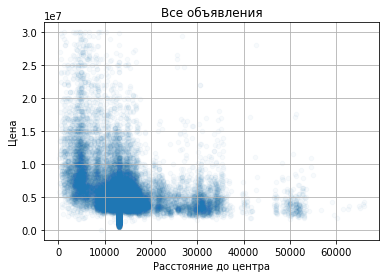

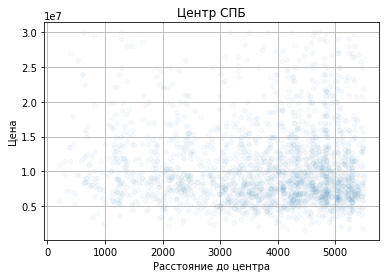

In [88]:
df.plot(x='city_centers_nearest', y='last_price', kind='scatter', alpha=0.03, grid=True)
plt.title("Все объявления")
plt.xlabel("Расстояние до центра")
plt.ylabel("Цена")
center_spb.plot(x='city_centers_nearest', y='last_price', kind='scatter', alpha=0.03, grid=True)
plt.title("Центр СПБ")
plt.xlabel("Расстояние до центра")
plt.ylabel("Цена")
plt.show()

In [89]:
#проверим корреляцию
center_spb['city_centers_nearest'].corr(center_spb['last_price'])

-0.030451413508989344

В центре СПБ совсем другая картина. Цена не зависит от удаленности от центра. Все дорого.

**Как цена зависит от дня недели, месяца и года**

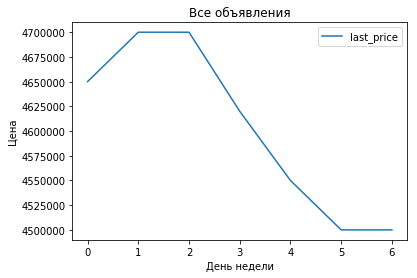

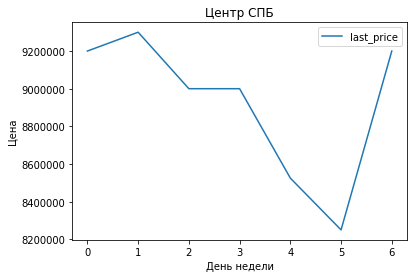

In [90]:
df.pivot_table(index = 'day_of_week', values = 'last_price', aggfunc = 'median').plot()
plt.title("Все объявления")
plt.xlabel("День недели")
plt.ylabel("Цена")
center_spb.pivot_table(index = 'day_of_week', values = 'last_price', aggfunc = 'median').plot()
plt.title("Центр СПБ")
plt.xlabel("День недели")
plt.ylabel("Цена")
plt.show()

<div class="alert alert-block alert-info">
Из графика видно что самая высокая  цена - воскресенье, вторник  (по общим объявлениям -  вторник, среда), квартиры со вторника по субботу дешевеют, но в воскресенье опять рост цен.
</div>


Text(0,0.5,'Цена')

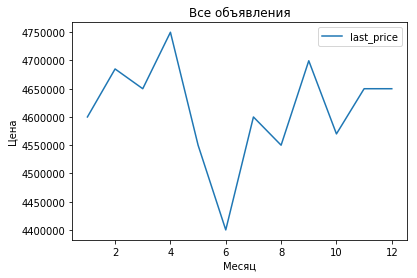

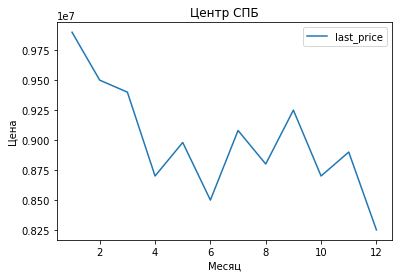

In [91]:
df.pivot_table(index = 'month', values = 'last_price', aggfunc = 'median').plot()
plt.title("Все объявления")
plt.xlabel("Месяц")
plt.ylabel("Цена")
center_spb.pivot_table(index = 'month', values = 'last_price', aggfunc = 'median').plot()
plt.title("Центр СПБ")
plt.xlabel("Месяц")
plt.ylabel("Цена")

Самая высокая цена продажи квартиры - январь (по общим объявлениям - апрель, сентябрь), самая низкая декабрь. С апреля  цены на квартиры не постояны, мы видим волнообразное повышение и понижение цен.


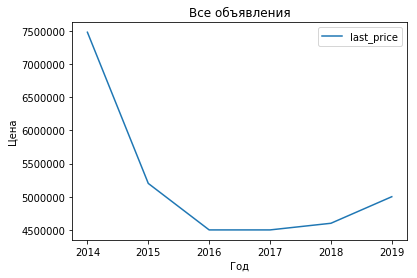

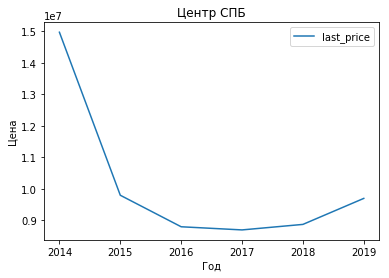

In [92]:
df.pivot_table(index = 'year', values = 'last_price', aggfunc = 'median').plot()
plt.title("Все объявления")
plt.xlabel("Год")
plt.ylabel("Цена")
center_spb.pivot_table(index = 'year', values = 'last_price', aggfunc = 'median').plot()
plt.title("Центр СПБ")
plt.xlabel("Год")
plt.ylabel("Цена")
plt.show()

С 2014 года стоимость квартир в центре СПБ постоянно падала, в 2017 году цены на жилье начали рости.

**Вывод**

<p>- Стоимость квартиры в центре СПБ зависит от площади квартиры, числа комнат.<p>
<p>- Стоимость квартиры в центре СПБ не зависит от удаления от центра.<p>
<p>- Стоимость квартиры в центре СПБ зависит от дня недели причем эти дни в центре СПБ и по всем остальным объявлениям разные.<p>
<p>- Стоимость квартиры в центре СПБ зависит от месяца (самая высокая цена продажи квартиры - январь (по общим объявлениям - апрель, сентябрь), самая низкая - декабрь. С апреля цены на квартиры не постояны, мы видим волнообразное повышение и понижение цен. <p> 
<p>- Стоимость квартиры с 2014 по 2016 г. стоимость квартир падала, с  2017 года стоимость квартиры начала расти.<p>

## Общий вывод

<p>- В среднем продажа квартиры занимает 110 дней. 75 процентов квартир продаются за 252 дня. <p>
<p>- На стоимость квартиры влияют такие показатели как площадь, количество комнат, удаление от центра.<p>
<p>- Стоимость квартиры зависит от этажа расположения, самые недорогие квартиры расположены на первых этажах.<p>
<p>- Стоимость квартиры зависит от дня недели размещения объявления. Самые дорогие объекты недвижимости размещаются со вторника по среду, с субботы по воскресенье цена на квартиру минимальна.<p>
<p>- Стоимость квартиры зависит от месяца размещения объявления. Самая высокая цена продажи квартира апрель, сентябрь, самая низкая июнь. <p>
<p>- Стоимость квартиры с 2014 по 2016 г. падала, с  2017 года стоимость квартиры начала расти.<p>